# PART ONE

In [1]:
# Import pandas
import pandas as pd
import numpy as np

# Import the course datasets 
repub_votes_small = pd.read_feather('datasets/repub_votes_potus_08_12.feather')
democrat_votes = pd.read_feather('datasets/dem_votes_potus_12_16.feather')
late_shipments = pd.read_feather('datasets/late_shipments.feather')
stack_overflow = pd.read_feather("datasets/stack_overflow.feather")

## Two-sample problems
Compare sample statistics across groups of a variable
converted_comp is a numerical variable
age_first_code_cut is a categorical variable with levels ( "child" and "adult" )
Are users who first programmed as a child compensated higher than those that started as adults?

**Hypotheses**  
H0: The mean compensation (in USD) is the same for those that coded first as a child and
those that coded first as an adult.  
$ H0: \mu_{child} = \mu_{adult} $  
$ H_0: \mu_{child} − \mu_{adult} = 0 $  
HA: The mean compensation (in USD) is greater for those that coded first as a child
compared to those that coded first as an adult.  
$ H_A: \mu_{child} > \mu_{adult} $  
$ H_A: \mu_{child} − \mu_{adult} > 0 $

In [2]:
stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
import numpy as np
xbar_adult = xbar[0]
xbar_child = xbar[1]
s_adult =s[0]
s_child = s[1]
n_adult =n[0]
n_child = n[1]
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator

## Calculating the sample mean

The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

You'll begin your analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In pandas, a value's proportion in a categorical DataFrame column can be quickly calculated using the syntax:

prop = (df['col'] == val).mean()
late_shipments is available, and pandas is loaded as pd.

### Instructions 

- Print the late_shipments dataset.
- Calculate the proportion of late shipments

In [2]:
# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Print the results
print(late_prop_samp)

          id       country  ... freight_cost_groups line_item_insurance_usd
0    36203.0       Nigeria  ...           expensive                  373.83
1    30998.0      Botswana  ...          reasonable                    1.72
2    69871.0       Vietnam  ...           expensive                  181.57
3    17648.0  South Africa  ...           expensive                  779.41
4     5647.0        Uganda  ...          reasonable                    0.01
..       ...           ...  ...                 ...                     ...
995  13608.0        Uganda  ...          reasonable                   12.72
996  80394.0    Congo, DRC  ...          reasonable                   13.10
997  61675.0        Zambia  ...           expensive                  210.49
998  39182.0  South Africa  ...           expensive                 1421.41
999   5645.0      Botswana  ...          reasonable                   23.04

[1000 rows x 27 columns]
0.061


## Calculating a z-score
Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

The sample statistic is available as late_prop_samp.

late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments, available as a list.

pandas and numpy are loaded with their usual aliases.

### Instructions

- Hypothesize that the proportion of late shipments is 6%.
- Calculate the standard error from the standard deviation of the bootstrap distribution.
- Calculate the z-score.

In [12]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error

# Print z_score
print(z_score)

In [12]:
import numpy as np
# Step 3. Repeat steps 1 & 2 many times, appending to a list
late_shipments_boot_distn = []
for i in range(5000):
    late_shipments_boot_distn.append(
       # Step 2. Calculate point estimate
        np.mean(
           # Step 1. Resample
            late_shipments.sample(frac=1, replace=True)['late']
        )
)

## Calculating p-values
In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

You'll now return to the late shipments dataset and the proportion of late shipments.

The null hypothesis, $H_0$, is that the proportion of late shipments is six percent.

The alternative hypothesis, $H_1$, is that the proportion of late shipments is greater than six percent.

The observed sample statistic, `late_prop_samp`, the hypothesized value, `late_prop_hyp` (6%), and the bootstrap standard error, `std_error` are available. norm from `scipy.stats` has also been loaded without an alias.
### Instructions 

- Calculate the z-score of late_prop_samp.
- Calculate the p-value for the z-score, using a right-tailed test.

In [ ]:
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error

# Calculate the p-value
p_value = 1-norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

## Calculating a confidence interval
If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

Sampling in Python demonstrated two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.

late_prop_samp and late_shipments_boot_distn are available; pandas and numpy are loaded with their usual aliases.

### Instructions 

- Calculate a 95% confidence interval from late_shipments_boot_distn using the quantile method, labeling the lower and upper intervals lower and upper.

In [ ]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

## Two sample mean test statistic
The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.

$$
  t = \frac{\bar{x}_{child}-\bar{x}_{adult}}{\sqrt{\frac{s^2_{child}}{n_{child}}+\frac{s^2_{adult}}{n_{adult}}}}
$$ 
 
 


While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

The sample means for the two groups are available as xbar_no and xbar_yes. The sample standard deviations are s_no and s_yes. The sample sizes are n_no and n_yes. numpy is also loaded as np.

### Instructions

-Calculate the numerator of the  test statistic.
- Calculate the denominator of the  test statistic.
- Use those two numbers to calculate the test statistic.

In [12]:
# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt((s_no**2)/n_no+(s_yes**2)/n_yes)

# Calculate the test statistic
t_stat = numerator/denominator

# Print the test statistic
print(t_stat)

t-rrific! When testing for differences between means, the test statistic is called 't' rather than 'z', and can be calculated using six numbers from the samples. Here, the value is about `-2.39` or `2.39`, depending on the order you calculated the numerator.

## From t to p
Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

$H_0$: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

$H_1$: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

The test statistic, t_stat, is available, as are the samples sizes for each group, n_no and n_yes. Use a significance level of alpha = 0.05.

t has also been imported from scipy.stats.

### Instructions 

- Calculate the degrees of freedom for the test.
- Compute the p-value using the test statistic, t_stat.

In [ ]:
# Calculate the degrees of freedom
degrees_of_freedom = n_no+n_yes-2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

## Visualizing the difference
Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

dem_votes_potus_12_16 is available as sample_dem_data. pandas and matplotlib.pyplot are loaded with their usual aliases.

### Instructions 

- Create a new diff column containing the percentage of votes for the democratic candidate in 2012 minus the percentage of votes for the democratic candidate in 2016.
- Calculate the mean of the diff column as xbar_diff.
- Calculate the standard deviation of the diff column as s_diff.
- Plot a histogram of the diff column with 20 bins.

In [14]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Print sample_dem_data
print(sample_dem_data)

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff)

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

## Using ttest()

Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

: The proportion of democratic votes in 2012 and 2016 were the same. 
: The proportion of democratic votes in 2012 and 2016 were different.

sample_dem_data is available and has the columns diff, dem_percent_12, and dem_percent_16 in addition to the state and county names. pingouin and has been loaded along with pandas as pd.

### Instructions 

- Conduct a t-test on the sample differences (the diff column of sample_dem_data), using an appropriate alternative hypothesis chosen from "two-sided", "less", and "greater".
- Conduct a paired test on the democratic votes in 2012 and 2016 (the dem_percent_12 and dem_percent_16 columns of sample_dem_data), using an appropriate alternative hypothesis.

In [ ]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], y=0, alternative='two-sided')
                 
# Print the test results
print(test_results)

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], y=sample_dem_data['dem_percent_16'], paired=True, alternative='two-sided')

# Print the paired test results
print(paired_test_results)

Paired t-test party! Using `.ttest()` lets you avoid manual calculation to run your test. When you have paired data, a paired t-test is preferable to the unpaired version because it reduces the chance of a false negative error.

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131


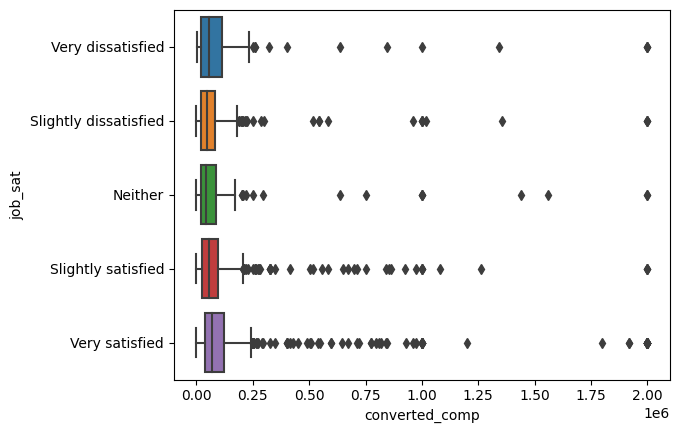

In [3]:
# ANOVA tests
import pingouin
stack_overflow['job_sat'].value_counts()
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="converted_comp",y="job_sat",data=stack_overflow)
plt.show
alpha = 0.2
pingouin.anova(data=stack_overflow, dv="converted_comp", between="job_sat")

# pairwise_tests()
pingouin.pairwise_tests(data=stack_overflow, dv="converted_comp", between="job_sat", padjust="none")

# Bonferroni correction
pingouin.pairwise_tests(data=stack_overflow, dv="converted_comp", between="job_sat", padjust="bonf")
 

## Visualizing many categories

So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases, and seaborn is loaded as sns.

### Instructions 

- Group late_shipments by shipment_mode and calculate the mean pack_price for each group, storing the result in xbar_pack_by_mode.
- Group late_shipments by shipment_mode and calculate the standard deviation pack_price for each group, storing the result in s_pack_by_mode
- Create a boxplot from late_shipments with "pack_price" as x and "shipment_mode" as y.

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64
shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


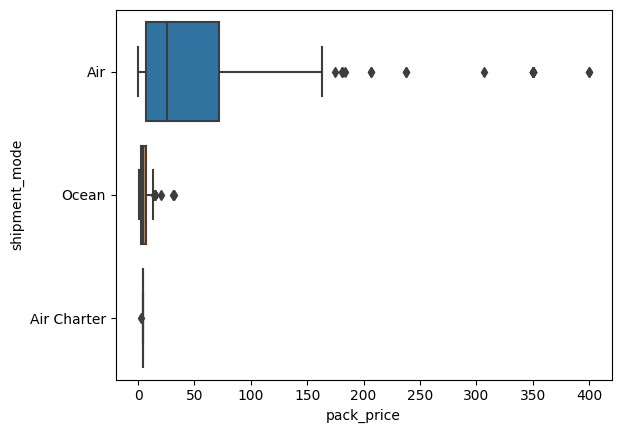

In [4]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x="pack_price", y='shipment_mode', data=late_shipments)
plt.show()

## Conducting an ANOVA test
The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

$H_0$: Pack prices for every category of shipment mode are the same.

$H_1$: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.

late_shipments is available and pingouin has been loaded.

## Instructions 

- Run an ANOVA on late_shipments investigating 'pack_price' (the dependent variable) between the groups of 'shipment_mode'.

In [4]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments, dv='pack_price', between='shipment_mode')

# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


## Pairwise t-tests
The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

late_shipments is available and pingouin has been loaded.

### Instructions 

- Perform pairwise t-tests on late_shipments's pack_price variable, grouped by shipment_mode, without doing any p-value adjustment.

In [5]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments, dv='pack_price', between='shipment_mode', padjust="none")

# Print pairwise_results
print(pairwise_results)


# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  ...         p-unc       BF10    hedges
0  shipment_mode          Air  Air Charter  ...  8.748346e-75  5.809e+76  0.726592
1  shipment_mode          Air        Ocean  ...  6.934555e-71  1.129e+67  0.711119
2  shipment_mode  Air Charter        Ocean  ...  3.123012e-03     15.277 -0.423775

[3 rows x 11 columns]
        Contrast            A            B  ...  p-adjust       BF10    hedges
0  shipment_mode          Air  Air Charter  ...      bonf  5.809e+76  0.726592
1  shipment_mode          Air        Ocean  ...      bonf  1.129e+67  0.711119
2  shipment_mode  Air Charter        Ocean  ...      bonf     15.277 -0.423775

[3 rows x 13 columns]


## Test for single proportions
In Chapter 1, you calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%. In that chapter, you used a bootstrap distribution to estimate the standard error of the statistic. An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.

$$
z=\frac{\hat{p}-p_0}{\sqrt{\frac{p_0*(1-p_0)}{n}}}
$$
 
You'll revisit the p-value using this simpler calculation.

late_shipments is available. pandas and numpy are available under their usual aliases, and norm is loaded from scipy.stats.

### Instructions 

- Hypothesize that the proportion of late shipments is 6%.
- Calculate the sample proportion of shipments where late equals "Yes".
- Calculate the number of observations in the sample.
- Calculate the numerator and denominator of the z-score.
- Calculate the z-score as the ratio of these numbers.
- Transform the z-score into a p-value, remembering that this is a "greater than" alternative hypothesis.

In [6]:
from scipy.stats import norm
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat-p_0
denominator = np.sqrt(p_0*(1-p_0)/n)

# Calculate the test statistic
z_score = numerator/denominator

# Print the result
print(z_score)

# Calculate the p-value from the z-score
p_value = 1-norm.cdf(z_score)

# Print the p-value
print(p_value)

0.061 1000
0.13315591032282698
0.44703503936503364


## Test of two proportions
You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the late_shipments dataset, whether or not the shipment was late is stored in the late column. Freight costs are stored in the freight_cost_group column, and the categories are "expensive" and "reasonable".

The hypotheses to test, with "late" corresponding to the proportion of late shipments for that group, are

$ H_0: late_{expensive}-late_{reasonable}=0$  
$ H_0: late_{expensive}-late_{reasonable}>0$  

`p_hats` contains the estimates of population proportions (sample proportions) for each freight_cost_group:

|              |          |     | 
|-------------|----      |-----|
|freight_cost_group  |late      |     |
|expensive           |Yes     |0.082569|
|reasonable          |Yes     |0.035165|
|Name: late, dtype: float64
ns contains the sample sizes for these groups:

|          |      |
|--------- |------|
|freight_cost_group   |   |
|expensive    |545|
|reasonable    |455|
|Name: late, dtype: int64

pandas and numpy have been imported under their usual aliases, and norm is available from scipy.stats.

### Instructions 

- Calculate the pooled sample proportion,from p_hats and ns.
$$
\hat{p} =\frac{n_{expensive} \times \hat{p}_{expensive}+n_{reasonable} \times \hat{p}_{reasonable}}{n_{expensive}+n_{reasonable}}
$$
- Calculate the standard error of the sample using this equation.

 $$
 SE(\hat{p}_{expensive}-\hat{p}_{reasonable}) = \sqrt{\frac{\hat{p} \times (1-\hat{p})}{n_{expensive}}+\frac{\hat{p} \times (1-\hat{p})}{n_{reasonable}}}
 $$
- Calculate p_hat multiplied by (1 - p_hat).
- Divide p_hat_times_not_p_hat by the number of "reasonable" rows and by the number of "expensive" rows, and sum those two values.
- Calculate std_error by taking the square root of p_hat_times_not_p_hat_over_ns.
- Calculate the z-score using the following equation.
$$
z = \frac{\hat{p}_{expensive}-\hat{p}_{reasonable}}{}
$$
# Calculate the pooled estimate of the population proportion

 $$ 
 \hat{p} = \frac{(\hat{p}_{reasonable} \times ns_{reasonable} + \hat{p}_{expensive} * ns_{expensive})}{(ns_{reasonable} + ns_{expensive})}
 $$
 

- Calculate the p-value from the z-score.

In [7]:
# Calculate the pooled estimate of the population proportion
p_hat = (545*0.082569 +455*0.035165)/(545+455)

# Print the result
print(p_hat)

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1-p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = (p_hat_times_not_p_hat/545)+(p_hat_times_not_p_hat/455)

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Print the result
print(std_error)
# Calculate the z-score
z_score = (0.082569-0.035165)/std_error

# Print z_score
print(z_score)

# Calculate the p-value from the z-score
p_value = 1-norm.cdf(z_score)

# Print p_value
print(p_value)

0.06100018000000001
0.015198277270102015
3.119037714442343
0.0009072136753094373


## proportions_ztest() for two samples
That took a lot of effort to calculate the p-value, so while it is useful to see how the calculations work, it isn't practical to do in real-world analyses. For daily usage, it's better to use the statsmodels package.

Recall the hypotheses.  
$ H_0: late_{expensive}-late_{reasonable}=0$  
$ H_0: late_{expensive}-late_{reasonable}>0$  

late_shipments is available, containing the freight_cost_group column. numpy and pandas have been loaded under their standard aliases, and proportions_ztest has been loaded from statsmodels.stats.proportion.

### Instructions 

- Get the counts of the late column grouped by freight_cost_group.
- Extract the number of "Yes"'s for the two freight_cost_group into a numpy array, specifying the 'expensive' count and then 'reasonable'.
- Determine the overall number of rows in each freight_cost_group as a numpy array, specifying the 'expensive' count and then 'reasonable'.
- Run a z-test using proportions_ztest(), specifying alternative as "larger".

In [8]:
from statsmodels.stats.proportion import proportions_ztest
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby('freight_cost_groups')['late'].value_counts()
# Print the counts
print(late_by_freight_cost_group)

# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([45, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([500+45, 439+16])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n, alternative="larger")


# Print the results
print(stat, p_value)

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: late, dtype: int64
3.1190401865206128 0.0009072060637051224


# Chi-square test of independence

                 test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  17.839570  1.0  0.000024  0.088826  0.988205
1        cressie-read  0.666667  17.818114  1.0  0.000024  0.088773  0.988126
2      log-likelihood  0.000000  17.802653  1.0  0.000025  0.088734  0.988069
3       freeman-tukey -0.500000  17.815060  1.0  0.000024  0.088765  0.988115
4  mod-log-likelihood -1.000000  17.848099  1.0  0.000024  0.088848  0.988236
5              neyman -2.000000  17.976656  1.0  0.000022  0.089167  0.988694
                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0

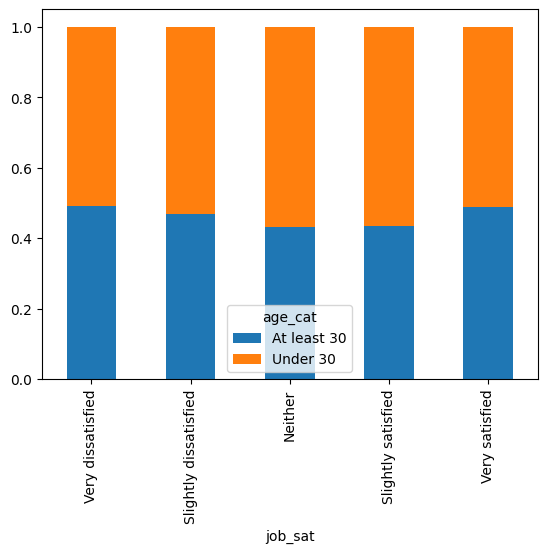

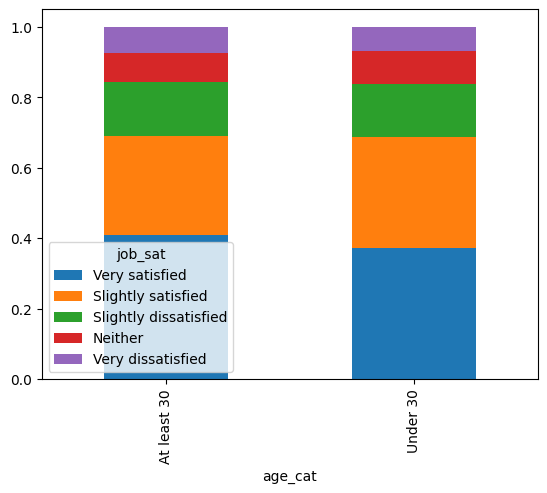

In [9]:
# Test for independence of variables
import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobbyist',
                                                        y='age_cat', correction=False)
print(stats)

# Job satisfaction and age category
stack_overflow['age_cat'].value_counts() 
stack_overflow['job_sat'].value_counts()
alpha = 0.1

#Exploratory visualization: proportional stacked bar plot
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)

# Chi-square independence test
import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="job_sat", y="age_cat")
print(stats)

# Swapping the variables?
props = stack_overflow.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)


# chi-square both ways
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="age_cat", y="job_sat")
print(stats[stats['test'] == 'pearson'])

## How many tails for chi-square tests?
Unlike pingouin.ttest() and statsmodels.stats.proportion.proportions_ztest(), pingouin.chi2_independence() does not have an alternative argument to specify which tails are considered by the alternative hypothesis.

Which tail is almost always considered in chi-square tests?

### Answer
Right on! The chi-square test statistic is a square number, so it is always non-negative, so only the right tail tends to be of interest.

## Performing a chi-square test
The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

- EXW: "Ex works". The buyer pays for transportation of the goods.  
- CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.  
- DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.  
- FCA: "Free carrier". The seller pays for transportation of the goods.  
Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.  

$ H_0:$ `vendor_inco_term` and `freight_cost_group` are independent.  

$ H_A:$ `vendor_inco_term` and `freight_cost_group` are associated.    

late_shipments is available, and the following have been loaded: matplotlib.pyplot as plt, pandas as pd, and pingouin.

### Instructions 

- Calculate the proportion of freight_cost_group in late_shipments grouped by vendor_inco_term.
- Unstack the .value_counts() result to be in wide format instead of long.
- Create a proportional stacked bar plot with bars filled based on freight_cost_group across the levels of vendor_inco_term
- Perform a chi-square test of independence on freight_cost_group and vendor_inco_term in the late_shipments dataset.
- What should you conclude from the hypothesis test?
- Ans: reject the null hypothesis and conclude that `freight_cost_group` and `vendor_inco_term` are associated

vendor_inco_term  freight_cost_groups
CIP               reasonable             0.680000
                  expensive              0.320000
DDP               expensive              0.550000
                  reasonable             0.450000
DDU               reasonable             1.000000
EXW               expensive              0.583448
                  reasonable             0.416552
FCA               reasonable             0.663636
                  expensive              0.336364
Name: freight_cost_groups, dtype: float64
freight_cost_groups  expensive  reasonable
vendor_inco_term                          
CIP                   0.320000    0.680000
DDP                   0.550000    0.450000
DDU                        NaN    1.000000
EXW                   0.583448    0.416552
FCA                   0.336364    0.663636


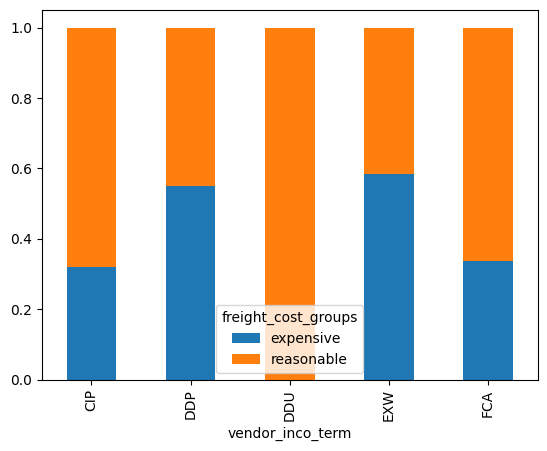

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


In [10]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Print props
print(props)

# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
print(wide_props)

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x='vendor_inco_term', y='freight_cost_groups')

# Print results
print(stats[stats['test'] == 'pearson']) 

Independence insight! The test to compare proportions of successes in a categorical variable across groups of another categorical variable is called a chi-square test of independence.

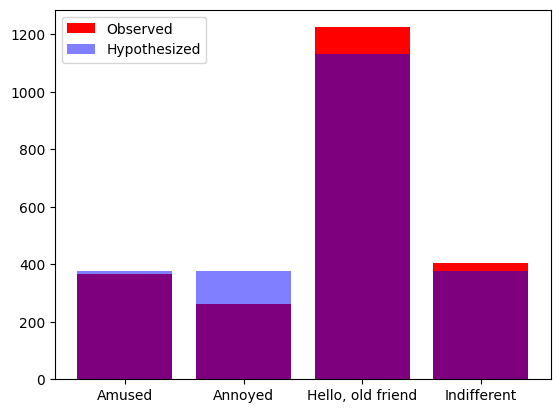

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

In [11]:
# Purple links
# How do you feel when you discover that you've already visited the top resource?
purple_link_counts = stack_overflow['purple_link'].value_counts()
purple_link_counts = purple_link_counts.rename_axis('purple_link')\
.reset_index(name='n')\
.sort_values('purple_link')

hypothesized = pd.DataFrame({ 'purple_link': ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'], 'prop': [1/6, 1/6, 1/2, 1/6]})

n_total = len(stack_overflow)
hypothesized["n"] = hypothesized["prop"] * n_total

# Visualizing counts
import matplotlib.pyplot as plt
plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], color='red', label='Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha=0.5, color='blue', label='Hypothesized')
plt.legend()
plt.show()

from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts['n'], f_exp=hypothesized['n'])
 

## Visualizing goodness of fit
The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Recall the vendor incoterms in the late_shipments dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.

- CIP: 0.05
- DDP: 0.1
- EXW: 0.75
- FCA: 0.1

These frequencies are stored in the hypothesized DataFrame.  
The incoterm_counts DataFrame stores the .value_counts() of the vendor_inco_term column.  
late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases.  

### Instructions 

- Find the total number of rows in late_shipments.
- Add a column named n to the hypothesized DataFrame that is the hypothesized prop column times n_total.
- Create a bar graph of 'n' versus 'vendor_inco_term' for the incoterm_counts data, specifying a red color.
- Add blue bars to the plot showing the same results from the hypothesized DataFrame, specifying an alpha of 0.5.

  vendor_inco_term  prop       n
0              CIP  0.05   49.95
1              DDP  0.10   99.90
2              EXW  0.75  749.25
3              FCA  0.10   99.90


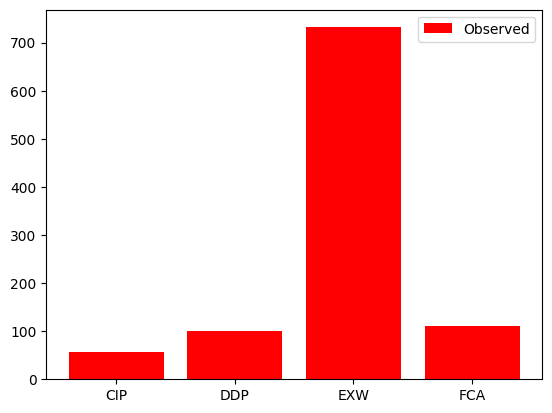

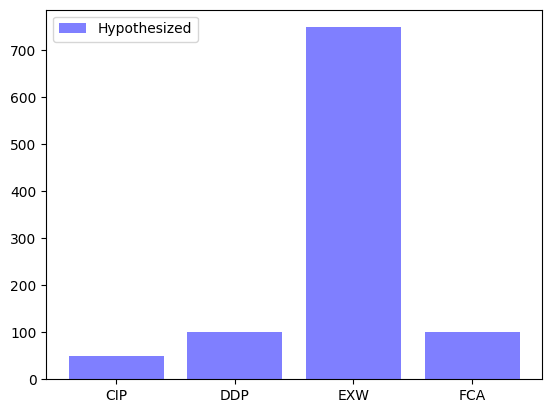

In [12]:
# Create the observed and hypothesized dataframes
incoterm_counts = pd.DataFrame({'vendor_inco_term':['CIP','DDP','EXW','FCA'], 'n':[56,100,732, 111]})
hypothesized = pd.DataFrame({ 'vendor_inco_term': ['CIP', 'DDP', 'EXW', 'FCA'], 'prop': [0.05, 0.10, 0.75, 0.10]})
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Find the number of rows in late_shipments
n_total = len(late_shipments)-1

# Create n column that is prop column * n_total
hypothesized['n'] = hypothesized['prop'] * n_total

# Print the modified hypothesized DataFrame
print(hypothesized)

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'],incoterm_counts['n'],  color='red',label="Observed")
plt.legend()
plt.show()

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'],hypothesized['n'], color='blue', alpha=0.5, label="Hypothesized")
plt.legend()
plt.show()

## Performing a goodness of fit test
The bar plot of vendor_inco_term suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a chi-square goodness of fit test to see whether the differences are statistically significant.

Recall the hypotheses for this type of test:

$H_0:$ The sample matches with the hypothesized distribution.  

$H_A:$ The sample does not match with the hypothesized distribution.  

To decide which hypothesis to choose, we'll set a significance level of 0.1.  

late_shipments, incoterm_counts, and hypothesized from the last exercise are available. chisquare from scipy.stats has been loaded.

### Instructions 

- Using the `incoterm_counts` and hypothesized datasets, perform a chi-square goodness of fit test on the incoterm counts, n.

In [13]:
# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs = incoterm_counts['n'], f_exp=hypothesized['n'])


# Print gof_test results
print(gof_test)

Power_divergenceResult(statistic=2.3633633633633613, pvalue=0.5004909543758689)


## Assumptions in hypothesis testing
**Testing sample size**
In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements: it is a random sample of the population, the observations are independent, and there are enough observations. Of these, only the last condition is easily testable with code.

The minimum sample size depends on the type of hypothesis tests you want to perform. You'll now test some scenarios on the late_shipments dataset.

Note that the .all() method from pandas can be used to check if all elements are true. For example, given a DataFrame df with numeric entries, you check to see if all its elements are less than 5, using (df < 5).all().

late_shipments is available, and pandas is loaded as pd.

### Instructions 

- Get the count of each value in the freight_cost_group column of late_shipments.
- Insert a suitable number to inspect whether the counts are "big enough" for a two sample t-test.
- Get the count of each value in the late column of late_shipments.
- Insert a suitable number to inspect whether the counts are "big enough" for a one sample proportion test.
- Get the count of each value in the freight_cost_group column of late_shipments grouped by vendor_inco_term.
- Insert a suitable number to inspect whether the counts are "big enough" for a chi-square independence test.
- Get the count of each value in the shipment_mode column of late_shipments.
- Insert a suitable number to inspect whether the counts are "big enough" for an ANOVA test.

In [14]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

expensive     531
reasonable    455
Name: freight_cost_groups, dtype: int64
True
No     939
Yes     61
Name: late, dtype: int64
True
vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64
False
Air            906
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


## Non-parametric Test

### Parametric tests
-  z-test, t-test, and ANOVA are all parametric tests 
-  Assume a normal distribution
- Require sufficiently large sample sizes

### Non-parametric tests
- Non-parametric tests avoid the parametric assumptions and conditions 
- Many non-parametric tests use ranks of the data
- Non-parametric tests are more reliable than parametric tests for small sample sizes and when data isn't normally distributed

### Wilcoxon-signed rank test
- Developed by Frank Wilcoxon in 1945
- One of the first non-parametric procedures
- Works on the ranked absolute differences between the pairs of data

In [15]:
alpha = 0.01
import pingouin
#pingouin.ttest(x=repub_votes_potus_08_12_small['repub_percent_08'], y=repub_votes_potus_08_12_small['repub_percent_12'], paired=True,alternative="less")
x= [1, 15,3, 10, 6]
from scipy.stats import rankdata
rankdata(x)
repub_votes_small['diff'] = repub_votes_small['repub_percent_08'] - repub_votes_small['repub_percent_12']
print(repub_votes_small) 

repub_votes_small['abs_diff'] = repub_votes_small['diff'].abs()
print(repub_votes_small)

from scipy.stats import rankdata
repub_votes_small['rank_abs_diff'] = rankdata(repub_votes_small['abs_diff'])
print(repub_votes_small)

# Incorporate the sum of the ranks for negative and positive differences
T_minus = 1 + 4 + 5 + 2 + 3
T_plus = 0
W = np.min([T_minus, T_plus])

alpha = 0.01
pingouin.wilcoxon(x=repub_votes_potus_08_12_small['repub_percent_08'], 
                  y=repub_votes_potus_08_12_small['repub_percent_12'],
                  alternative="less")
 

         state       county  repub_percent_08  repub_percent_12       diff
0      Alabama         Hale         38.957877         37.139882   1.817995
1     Arkansas       Nevada         56.726272         58.983452  -2.257179
2   California         Lake         38.896719         39.331367  -0.434648
3   California      Ventura         42.923190         45.250693  -2.327503
4     Colorado      Lincoln         74.522569         73.764757   0.757812
..         ...          ...               ...               ...        ...
95   Wisconsin      Burnett         48.342541         52.437478  -4.094937
96   Wisconsin    La Crosse         37.490904         40.577038  -3.086134
97   Wisconsin    Lafayette         38.104967         41.675050  -3.570083
98     Wyoming       Weston         76.684241         83.983328  -7.299087
99      Alaska  District 34         77.063259         40.789626  36.273633

[100 rows x 5 columns]


## Wilcoxon signed-rank test

You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.

sample_dem_data is available, and has columns dem_percent_12 and dem_percent_16 in addition to state and county names. The following packages have also been loaded: pingouin and pandas as pd.

### Instructions 

- Conduct a paired t-test on the percentage columns using an appropriate alternative hypothesis.
- Conduct a Wilcoxon-signed rank test on the same columns.

In [ ]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],y=sample_dem_data['dem_percent_16'],paired=True, alternative='two-sided')

# Print paired t-test results
print(paired_test_results)

# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data['dem_percent_12'],y=sample_dem_data['dem_percent_16'], alternative='two-sided')


# Print Wilcoxon test results
print(wilcoxon_test_results)

## Wilcoxon-Mann-Whitney test
- Also know as the Mann Whitney U test
- A t-test on the ranks of the numeric input Works on unpaired data

## Kruskal-Wallis test
- Kruskal-Wallis test is to Wilcoxon-Mann-Whitney test as ANOVA is to t-test

In [16]:
age_vs_comp = stack_overflow[['converted_comp', 'age_first_code_cut']]
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut', values='converted_comp')
alpha=0.01
# Wilcoxon-Mann-Whitney test
import pingouin
pingouin.mwu(x=age_vs_comp_wide['child'], y=age_vs_comp_wide['adult'], alternative='greater')
# Kruskal-Wallis test
pingouin.kruskal(data=stack_overflow, dv='converted_comp', between='job_sat')

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


## Wilcoxon-Mann-Whitney
Another class of non-parametric hypothesis tests are called rank sum tests. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.

late_shipments is available, and the following packages have been loaded: pingouin and pandas as pd.

### Instructions

- Select weight_kilograms and late from late_shipments, assigning the name weight_vs_late.
- Convert weight_vs_late from long-to-wide format, setting columns to 'late'.
- Run a Wilcoxon-Mann-Whitney test for a difference in weight_kilograms when the shipment was late and on-time.

In [17]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms','late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'],y=weight_vs_late_wide['Yes'], alternative='two-sided')

# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014  0.331902  0.334049


## Kruskal-Wallis
Recall that the Kruskal-Wallis test is a non-parametric version of an ANOVA test, comparing the means across multiple groups.

late_shipments is available, and the following packages have been loaded: pingouin and pandas as pd.

### Instructions

- Run a Kruskal-Wallis test on weight_kilograms between the different shipment modes in late_shipments.

In [18]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments,dv='weight_kilograms', between='shipment_mode')

# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28
